# MLPR LAB 2

### PROSHITA AGARWAL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
np.random.seed(0)

#number of points per cluster(randomly chosen )
n_samples = 250

In [11]:
#as given
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]

mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]

mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

In [12]:
data1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
data2 = np.random.multivariate_normal(mu2, sigma2, n_samples)
data3 = np.random.multivariate_normal(mu3, sigma3, n_samples)
data4 = np.random.multivariate_normal(mu4, sigma4, n_samples)

#combining all data
X = np.vstack((data1, data2, data3, data4))

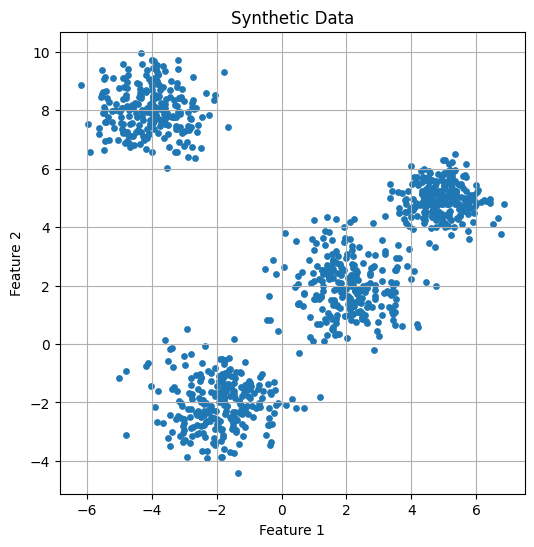

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=15) #s=15 sets the size of each dot to be 15 making them small to avoid overlapping
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [6]:
wcss = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

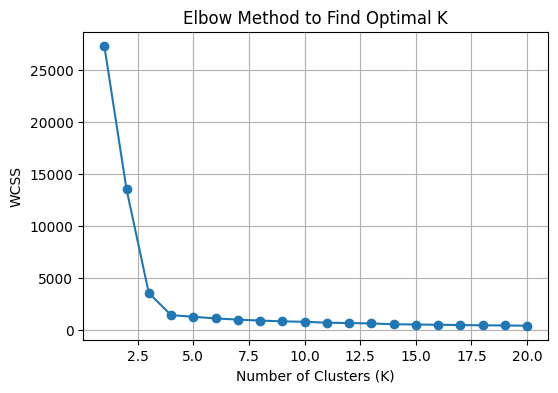

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 21), wcss, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

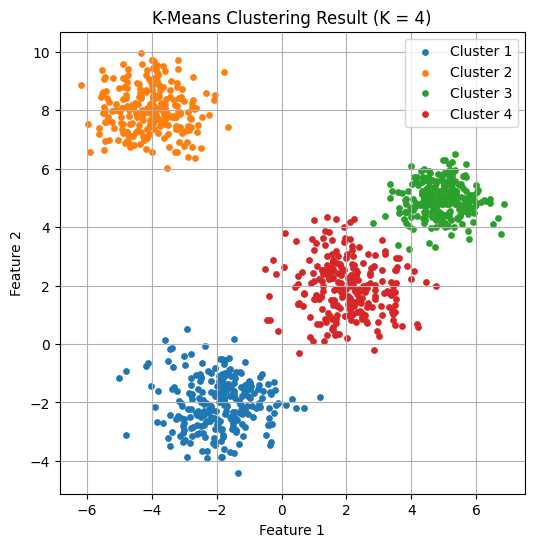

In [9]:
plt.figure(figsize=(6, 6))

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=15, label="Cluster 1")
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=15, label="Cluster 2")
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=15, label="Cluster 3")
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s=15, label="Cluster 4")

plt.title("K-Means Clustering Result (K = 4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-1.92442631 -2.03244433]
 [-4.0372005   8.02917531]
 [ 4.92762373  4.95464554]
 [ 2.01496795  1.93651852]]


## Report: K-Means Clustering and Elbow Method

***Q1. What might happen if the value of the number of clusters is set too high or too low in K-Means?***

*If the number of clusters is set too low, K-Means is forced to group together data points that may actually belong to different natural groups. This results in poor clustering where important patterns in the data are lost, and clusters become too broad and inaccurate.*

*On the other hand, if the number of clusters is set too high, the algorithm may overfit the data by creating many small clusters. This can split a single natural cluster into multiple unnecessary clusters, making the result harder to interpret and less meaningful.*

***Q2. What is the effect of initializing centroids far apart or too close together in K-Means, and how might this affect the final clustering??***

*The initial placement of centroids has a significant effect on how K-Means performs. If the centroids are initialized too close together, they may end up competing for the same region of data, causing some clusters to be poorly formed or even empty.If centroids are initialized very far apart, convergence may take longer, but it often helps in covering different regions of the data space more effectively. Since K-Means can converge to local minima, poor initialization can lead to suboptimal clustering results.*

***Q3. How might you optimise the centroid initialisation to lead to better clustering?***

*One effective way to optimise centroid initialization is by using K-Means++, which selects initial centroids that are well spread out across the data. This reduces the chances of poor initialization and helps the algorithm converge faster and to better solutions. Running K-Means multiple times with different initial centroids and selecting the best result based on the lowest WCSS is another common and effective approach.*

***Q4. Why might the Elbow Method not always provide a clear solution for choosing the optimal number of clusters?***

*The Elbow Method does not always give a clear answer because, in some datasets, the WCSS decreases gradually rather than sharply. This makes it difficult to visually identify a clear “elbow” point. In such cases, the data may not have well-separated clusters, or the underlying structure might be more complex. As a result, choosing the optimal number of clusters becomes subjective and may require additional methods or domain knowledge.*

***Q5. How can WCSS be influenced by the presence of outliers or noise in the data?***

*Outliers and noise can significantly increase the WCSS because they are far from the cluster centroids. Since WCSS is based on squared distances, even a small number of extreme points can heavily influence its value. This can lead K-Means to form clusters around outliers or shift centroids away from dense regions, resulting in poorer clustering performance. Preprocessing steps such as outlier removal or normalization can help reduce this effect.*